## Making Pennies for Patients Word Cloud with Pennies

Making a T-Shirt design for Pennies for Patients.

### Import Libraries

Includes numpy, os, PIL, and the wordcloud library.

In [1]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Initial Starting Design

Start by getting text from Pennies website (pre-saved), and then creating a starting wordcloud.

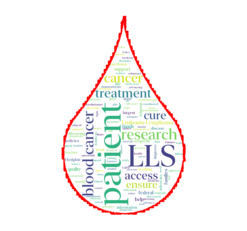

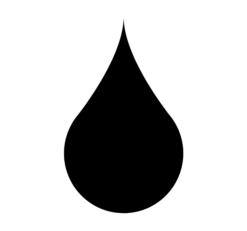

In [2]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'text/pennies.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "masks/blood_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

font_path = path.join(d, 'fonts', 'New York', 'fonts/NewYork.ttf')

wc = WordCloud(font_path=font_path, background_color="white", max_words=500, mask=alice_mask,
               stopwords=stopwords, contour_width=5, contour_color='red')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "wordclouds/pennies_logo.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

### Making a Better Design

Still a protot

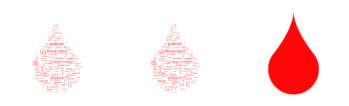

In [4]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'text/pennies.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "masks/red_blood.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")
font_path = path.join(d, 'fonts', 'New York', 'fonts/NewYork.ttf')

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42, contour_color='red')
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

updated_image = wc.recolor(color_func=image_colors)
wc.to_file(path.join(d, "wordclouds/red.png"))

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()